Import Libraries:
The libraries like pandas, seaborn and matplotlib are used to visualize the data and it is used to get the data.

In [ ]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Our Assignment is Regarding the Amazon titles and we are pulling the data from the csv file

In [ ]:
#Load the dataset
Amazon_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_prime/amazon_prime_titles.csv')
print(Amazon_data.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

  date_added  release_year rating duration                listed_in  \
0  30-Mar-21          2014    NaN  113 min            Comedy, Drama   
1  30-Mar-21          2018    13+  110 min     Drama, International   
2  30

Here we are working on the data cleaning process where we are going to clean the data like duplicates, missing values as well. There are total of 9 working steps.
Step1: Removal of duplicates

We eliminated duplicates based on the show_id column to guarantee that every entry in the dataset is distinct. This stage ensures data integrity for next studies by confirming that each program or film is represented uniquely.

In [ ]:
# Data Cleaning nad PreProcessing
# Step-1: Remove the Duplicates
Amazon_data.drop_duplicates(subset = 'show_id', inplace=True)

In particular, ‘Unknown’ was used to fill in the missing data in the director, cast, nation, and date_added fields.

In [ ]:
#Step2: Handling the missing values
Amazon_data['director'].fillna('Unknown', inplace=True)
Amazon_data['cast'].fillna('Unknown', inplace=True)
Amazon_data['country'].fillna('Unknown', inplace=True)
Amazon_data['date_added'].fillna('Unknown', inplace=True)


In this we standardised the entries in the director and country columns to address inconsistencies in textual data. This required eliminating any leading or trailing whitespace and changing every entry to title case. By ensuring consistency in naming conventions, this makes reliable analysis possible.


In [ ]:
#Step3: Standardize the text data
# Stndardize country names
Amazon_data['country']=Amazon_data['country'].str.title().str.strip()
# Standarddize the director names to handle the inconsistency
Amazon_data['director']= Amazon_data['director'].str.title().str.strip()

Here the column mode was used to fill in this missing values in the rating column. The overall rating patter is preserved when the most frequent rating is used, as this guarantees that the imputation is based on the dataset intrinsic distribution.

In [ ]:
#Step4: Handling missing ratings with mode
Mode_Rating = Amazon_data['rating'].mode()[0]
Amazon_data['rating'].fillna(Mode_Rating, inplace = True)


To enable time-based analysis, we changed the data_aded field to a datetime format. This phase permits consistent data manipulations and additional data-related actions, despite format inference warnings.

In [ ]:
#Step5: Convert datatypes for the datetime
Amazon_data['date_added'] = pd.to_datetime(Amazon_data['date_added'], errors='coerce', exact=False)


<ipython-input-9-86d08af4b2ed>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Amazon_data['date_added'] = pd.to_datetime(Amazon_data['date_added'], errors='coerce', exact=False)


In this step we took the year out of the data_added column and made a new column called year_added to make it easier to analyse patterns over time. Zeros were used to fill in any missing data, and the column was changed to an integer type.

In [ ]:
#Step6: Extract Year from date_added
Amazon_data['year_added'] = Amazon_data['date_added'].dt.year.fillna(0).astype(int)

In order to express duration in minutes, we took numerical values out of the duration column and standardised them. The quantitative study of content length is supported by this conversion to numeric representation.

In [ ]:
# Step 7: Standardizing 'duration' field to numeric
Amazon_data['duration_minutes'] = Amazon_data['duration'].str.extract('(\d+)').astype(int)

Based on ratings, we divided the content into four categories : “Family,” “Teen,” “Adult,”  and “Others”. By putting material into more general categories, this categorization makes audience targeting and content recommendation tactics easier.


In [ ]:
#Step8: Categorize the Comtent based ratings
def categorize_content(rating):
    if rating in ['PG', 'TV-Y', 'TV-G', 'G']:
        return 'Family'
    elif rating in ['PG-13', 'TV-14']:
        return 'Teen'
    elif rating in ['R', 'TV-MA']:
        return 'Adult'
    else:
        return 'others'

Amazon_data['content_category'] = Amazon_data['rating'].apply(categorize_content)

We eliminated the entries whose duration_minutes above the 99th percentile in order to address excessive values in content length. By taking this precaution, outliers are prevented from distorting the study and giving a more realistic depiction of average content lengths.

In [ ]:
#step9:Identification and remove outliers
accepted_dur = Amazon_data['duration_minutes'].quantile(0.99)
Amazon_data = Amazon_data[Amazon_data['duration_minutes'] <= accepted_dur]


The primary genre is assigned from the Amazon data from the overall list. Example is the Action, Drama and Thriller the primary genre is thhe Action

In [ ]:
Amazon_data['primary_genre'] = Amazon_data['listed_in'].apply(lambda x: x.split(',')[0])


<ipython-input-14-882f320bd3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amazon_data['primary_genre'] = Amazon_data['listed_in'].apply(lambda x: x.split(',')[0])


The Amazon Titles data has been printed

In [ ]:
print(Amazon_data.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don Mckellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

  date_added  release_year rating duration                listed_in  \
0 2021-03-30          2014    13+  113 min            Comedy, Drama   
1 2021-03-30          2018    13+  110 min     Drama, International   
2 202

We described about the statisticss of the data

In [ ]:
# Statistics of the data
print(Amazon_data.describe())

                          date_added  release_year   year_added  \
count                            155   9582.000000  9582.000000   
mean   2021-07-14 13:46:50.322580736   2008.343456    32.692027   
min              2021-03-30 00:00:00   1920.000000     0.000000   
25%              2021-05-23 00:00:00   2007.000000     0.000000   
50%              2021-07-20 00:00:00   2016.000000     0.000000   
75%              2021-09-16 00:00:00   2019.000000     0.000000   
max              2021-10-10 00:00:00   2021.000000  2021.000000   
std                              NaN     18.945813   254.967845   

       duration_minutes  
count       9582.000000  
mean          72.209038  
min            0.000000  
25%           40.000000  
50%           86.000000  
75%          100.000000  
max          170.000000  
std           44.087542  


Examined how different content genres were distributed (TV series Versus movies.)

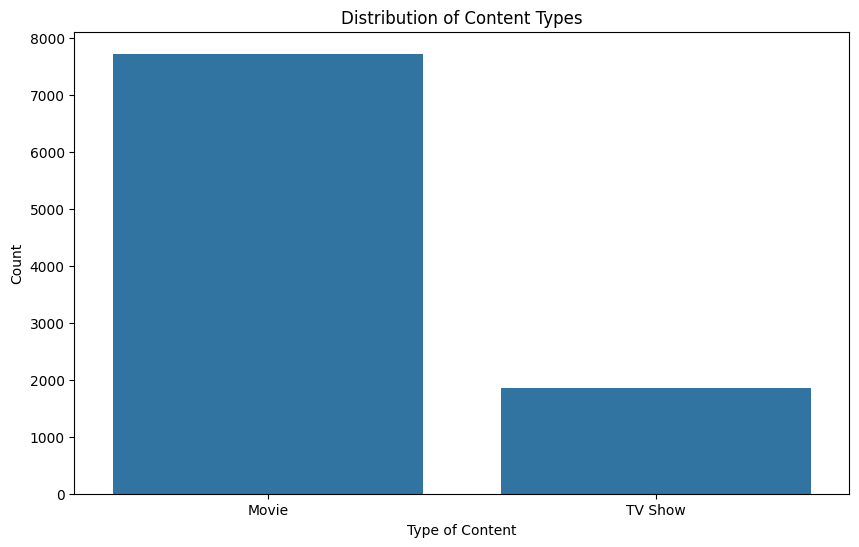

In [ ]:
#EDA Analysis
# Distribution of Content Types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=Amazon_data)
plt.title('Distribution of Content Types')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

A bar plot was used to visualised the primary genre distribution.


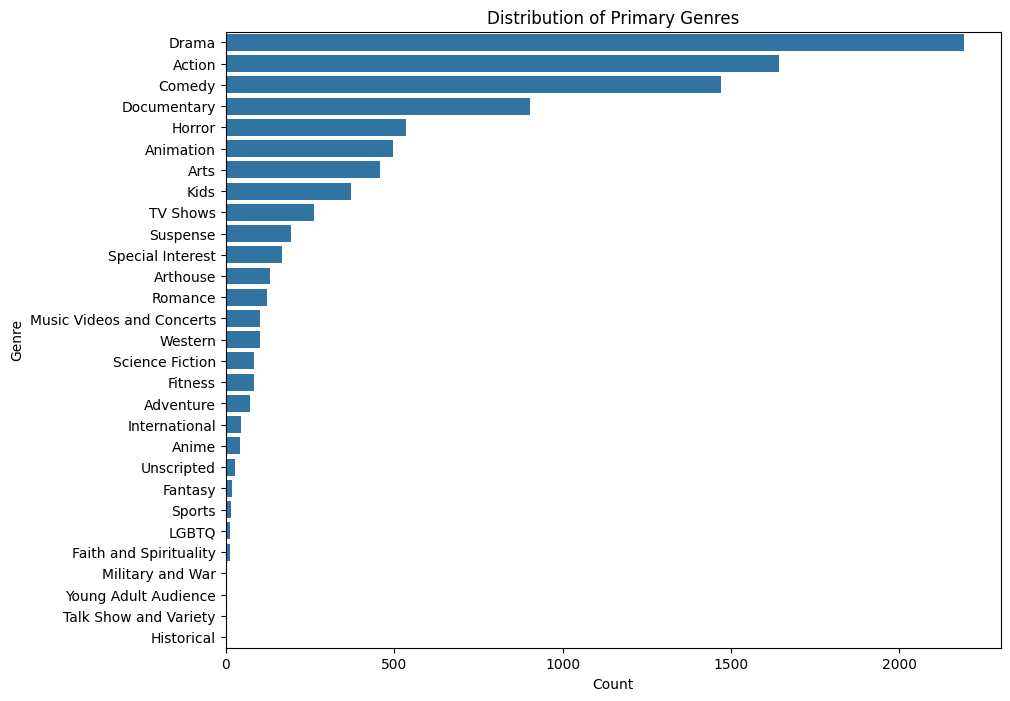

In [ ]:
# BAr plot for the primary genres
plt.figure(figsize=(10, 8))
genre_count = Amazon_data['primary_genre'].value_counts()
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title('Distribution of Primary Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Box and violin plots were used to analyse the length of the content.


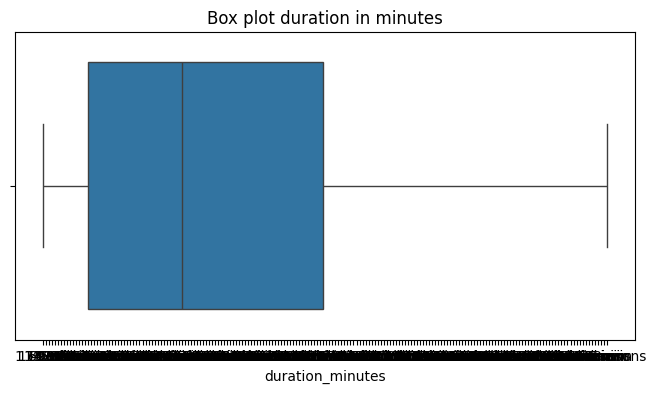

In [ ]:
#BoxPlot in minutes
plt.figure(figsize=(8,4))
sns.boxplot(x=Amazon_data['duration'])
plt.title('Box plot duration in minutes')
plt.xlabel('duration_minutes')
plt.show()

A histogram was used to analyse the distribution of release years.


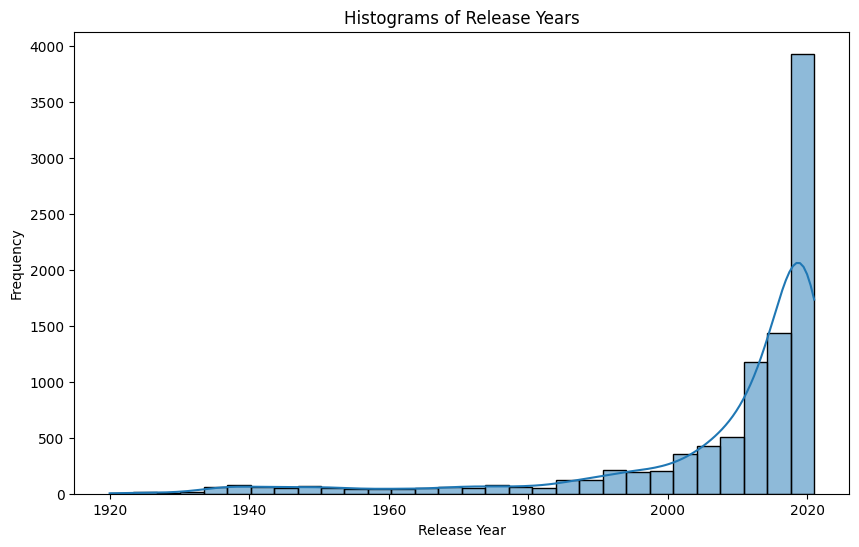

In [ ]:
# Histogram of release years
plt.figure(figsize=(10, 6))
sns.histplot(Amazon_data['release_year'], bins=30, kde=True)
plt.title('Histograms of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Count plots were used to visualise the distribution of content by categories.

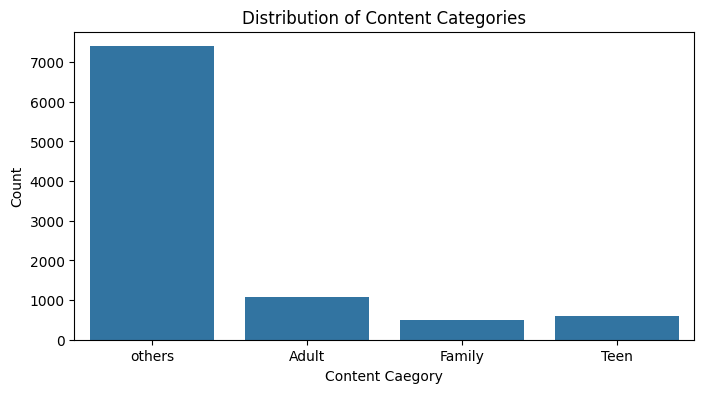

In [ ]:
# Distribution of Content by categories
plt.figure(figsize=(8, 4))
sns.countplot(x='content_category', data=Amazon_data)
plt.title('Distribution of Content Categories')
plt.xlabel('Content Caegory')
plt.ylabel('Count')
plt.show()

Box plots were used to analysed the length of material in various categories.

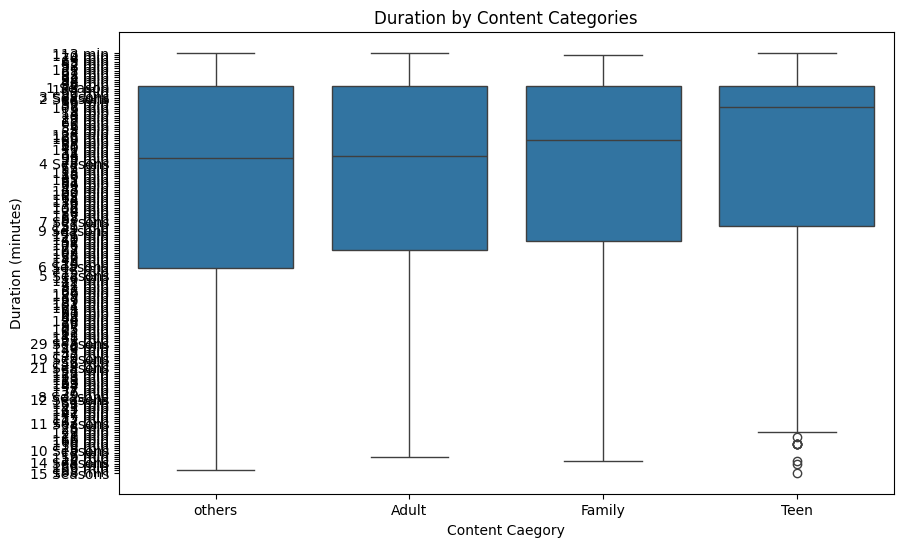

In [ ]:
#Duration of Content VS Content Category
plt.figure(figsize=(10, 6))
sns.boxplot(x ='content_category',y = 'duration', data=Amazon_data)
plt.title('Duration by Content Categories')
plt.xlabel('Content Caegory')
plt.ylabel('Duration (minutes)')
plt.show()

A Heatmap is used to visualise correlation between numerical variables.


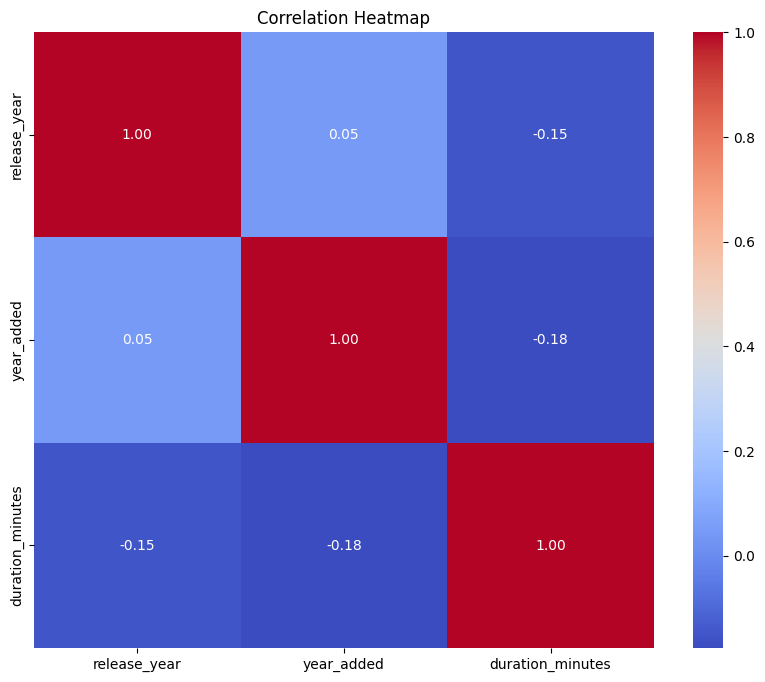

In [ ]:
# Heatmap of Correlations
plt.figure(figsize=(10, 8))
correlation_matrix = Amazon_data.select_dtypes(include=['int64', 'float64']).corr()  # Select numeric columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

This violin plot shows how the length of content varies in the following categories : Teen, Adult, Family, and Others. It demonstrates that there is a wider variety of durations with distinct peaks in the Others and Adult groups. The Family and Teen categories, on the other hand, have less diversity in their lengths with more of their durations centred around a core point.


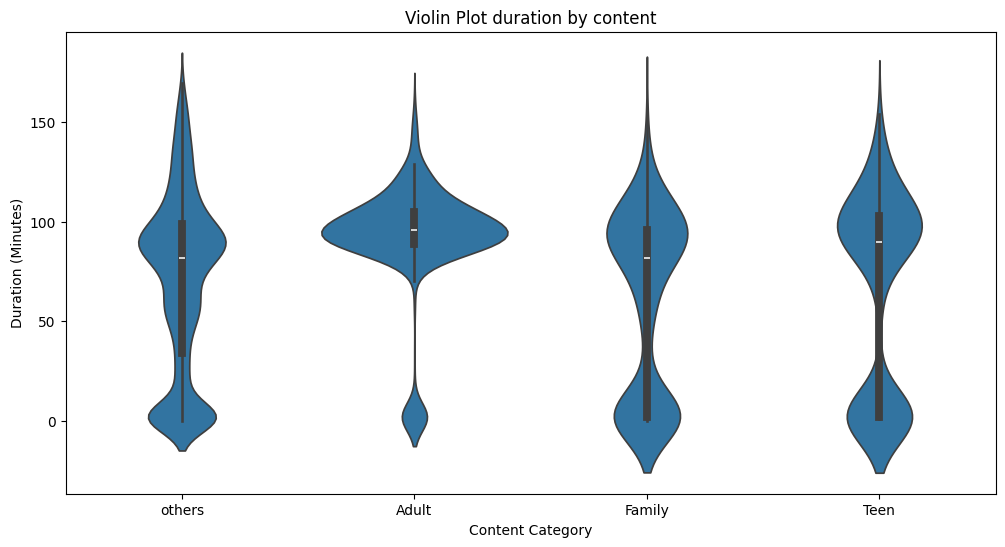

In [ ]:
#Violin Plot in Duration in Minutes by content Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='content_category', y='duration_minutes', data=Amazon_data)
plt.title('Violin Plot duration by content')
plt.xlabel('Content Category')
plt.ylabel('Duration (Minutes)')
plt.show()